# A continuación se hará un análisis exploratorio del archivo *Auctions*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

In [3]:
auctions = pd.read_csv('./datos/auctions.csv')

### Análisis del tipo de datos

Primero que nada, vamos a ver como está organizada la información y que tipo de datos les asigna Pandas a cada columna.

Podemos ver que el archivo cuenta con **19.571.319 filas** y **7 columnas**. Pesa más de un GigaByte, por lo que trataremos de reducir dicho tamaño.

In [4]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    float64
country            int64
date               object
device_id          int64
platform           int64
ref_type_id        int64
source_id          int64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.0+ GB


In [5]:
#Cantidad de nulos por columna
auctions.isnull().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

Como podemos ver, la columna ***auction_type_id*** tiene una cantidad de 19.571.319 nulos, que a su vez es el número de filas que tenemos en nuestro DataFrama, por lo que podemos eliminar dicha columna para liberar el espacio que ocupa. 

In [6]:
auctions = auctions.drop(['auction_type_id'], axis='columns')

In [7]:
auctions['country'].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

Analizando la columna ***country*** podemos ver que para todos los datos se obtiene el mismo valor y está determinado por el tipo **int64**. Esto nos permite realizar dos acciones depende el enfoque del análisis que haremos con dicho archivo.

+ Si trabajamos solo con este archivo podemos desisir de dicha columna eliminándola para poder reducir el tamaño de los datos. Cuando lleguemos a una conclusión, sabremos de que se tratan de subastas solo para dicho país.
+ Ahora bien, si trabajamos junto con otro archivo y necesitamos ésta columna, lo que podemos hacer es cambiarle el tipo de dato a 'category'.

En ambas formas, reduciremos bastante el tamaño del archivo. En éste caso, como estamos realizando un análisis exploratorio de subastas solamente, optaremos por eliminarla.

In [8]:
auctions = auctions.drop(['country'], axis='columns')

De una manera bastante parecida podemos tratar a otras columnas, en ellas no tenemos un solo valor pero se tienen sólo una cantidad finita (y pequeña) de valores posibles. Por ende, nos servirá cambiar el tipo de int64 a category. Las columnas son las siguientes:

+ ***ref_type_id*:** respresenta **Apple ifa** o **Gogle advertising id**.
+ ***platform*:** indica la plataforma en donde se realizó la subasta. Los dos posibles valores que tenemos son **Android** y **IOS**.
+ ***source_id*:** indica la fuente de la que se produce la subasta. En éste caso tenemos cinco valores posibles.

In [9]:
auctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

In [10]:
auctions['ref_type_id'] = auctions['ref_type_id'].astype('category')

In [11]:
auctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [12]:
auctions['platform'] = auctions['platform'].astype('category') 

In [13]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [14]:
auctions['source_id'] = auctions['source_id'].astype('category')

In [15]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 5 columns):
date           object
device_id      int64
platform       category
ref_type_id    category
source_id      category
dtypes: category(3), int64(1), object(1)
memory usage: 354.6+ MB


In [16]:
auctions.sample(5)

,date,device_id,platform,ref_type_id,source_id
2382136,2019-03-09 17:31:58.396324,4927080238279181808,1,1,0
3421083,2019-03-07 17:42:13.220949,7718927202525698355,2,7,1
2533175,2019-03-11 05:15:28.371740,6234315244361768140,1,1,0
14182877,2019-03-05 05:07:02.682139,7010516250000269374,1,1,0
13876617,2019-03-10 15:46:09.407885,3897800119884419926,1,1,0


Analizando la columna ***date***, podemos ver que se trata de la fecha en que ocurrió la subasta y que Pandas la interpetró como **object**.

Para entender y analizar mejor los datos, vamos a dividir dicha columna en ***year***, ***month***, ***day***, ***weekday*** y ***hour***. Para ello primero debemos transformar la columna ***date*** al tipo datetime.

In [17]:
auctions['date'] = pd.to_datetime(auctions['date'])

In [18]:
auctions['year'] = auctions['date'].dt.year
auctions['month'] = auctions['date'].dt.month
auctions['day'] = auctions['date'].dt.day
auctions['weekday'] = auctions['date'].apply(lambda x: x.day_name())

In [19]:
auctions['hour'] = auctions['date'].dt.hour

#### Ahora bien, vamos a analizar las columnas creadas.

In [20]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 10 columns):
date           datetime64[ns]
device_id      int64
platform       category
ref_type_id    category
source_id      category
year           int64
month          int64
day            int64
weekday        object
hour           int64
dtypes: category(3), datetime64[ns](1), int64(5), object(1)
memory usage: 1.1+ GB


In [21]:
auctions['year'].value_counts()

2019    19571319
Name: year, dtype: int64

In [22]:
auctions['month'].value_counts()

3    19571319
Name: month, dtype: int64

Tanto para la columna ***year*** como para ***month***, podemos ver que cada una solo tiene un valor posible, siendo 2019 el año y 3 para el mes, es decir, que los datos representados en nuetro archivo corresponden al mes de Marzo de 2019. Por lo que podemos eliminar dichas columnas, teniendo en cuenta al final, que el análisis corresponde a dicho período de tiempo

In [23]:
auctions = auctions.drop(['year'], axis='columns')

In [24]:
auctions = auctions.drop(['month'], axis='columns')

Por otro lado, las columnas ***day*** y ***hour*** son valores númericos pero no es necesario representarlos como un **int64**. Por ende cambiaremos el tipo a **int8** para reducir el tamaño del archivo.

In [25]:
auctions['day'] = auctions['day'].astype(np.int8)
auctions['hour'] = auctions['hour'].astype(np.int8)

Si analizamos las fechas de los datos presentes en el archivo en cuestión, podemos determinar que corresponden al período que va del día 5 al 13 de Marzo de 2019. En el cual tenemos dos días Miércoles y dos Jueves.

In [26]:
auctions.groupby('weekday')['day'].value_counts()

weekday    day
Friday     8      2303002
Monday     11     2574916
Saturday   9      2074552
Sunday     10     2637534
Thursday   7      2047661
Tuesday    12     2779910
           5      1182401
Wednesday  13     2938373
           6      1032970
Name: day, dtype: int64

Si analizamos el id de los dispositivos que aparecen en las subastas del período de tiempo de nuestro archivo, podemos ver que el dispositivo que más aparece lo hace 27.762 veces.  

Y en promedio, cada dispositivo participa entre 94 y 95 subastas.

In [27]:
auctions['device_id'].value_counts().describe()

count    206977.000000
mean         94.557941
std         326.853497
min           1.000000
25%           4.000000
50%          16.000000
75%          67.000000
max       27762.000000
Name: device_id, dtype: float64

In [28]:
auctions['device_id'].value_counts().head(10)

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
8963711959081981780    14362
795159065504552200     12275
6841615430383729819    12077
5384039226444052914    11632
3198179064438296471    11565
Name: device_id, dtype: int64

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

#### Para analizar el tiempo entre subastas para un mismo dispositivo vamos a usar otro DataFrame

Usaremos un DataFrame nuevo solo por el hecho de no estar manipulando las columnas que no nos importan para ésta sección y así reduciremos el tamaño de la información manejada.

In [29]:
#Ordenamos por date sino la fecha posterior no necesariamente va a cumplirse.
auctions_time = auctions[['device_id','date']].sort_values('date')

Ahora vamos a crear dos nuevas columnas:
+ ***afterward_date*:** que representa la fecha posterior en la que un dispositivo participa nuevamente en una subasta.
+ ***time_between_dates*:** que indica la diferencia entre *afterward_date* y *date*, es decir, contiene el tiempo que pasa entre dos subastas consecutivas del mismo dispositivo.

In [30]:
auctions_time['afterward_date'] = auctions_time.groupby('device_id')['date'].apply(lambda valor: valor.shift(-1))

In [31]:
auctions_time.head()

,device_id,date,afterward_date
15970478,693613851330160675,2019-03-05 00:52:33.352526,2019-03-05 00:53:45.598287
15970479,9063949842367241188,2019-03-05 00:52:40.105398,2019-03-05 00:53:09.693816
13161747,2824300781193788917,2019-03-05 00:52:45.092232,2019-03-05 00:56:37.040497
7339830,4395616356137861817,2019-03-05 00:52:46.102552,2019-03-05 00:58:30.464174
15970480,874322742462616406,2019-03-05 00:52:47.151640,2019-03-05 01:25:41.146609


In [32]:
auctions_time.isnull().sum()

device_id              0
date                   0
afterward_date    206977
dtype: int64

- Tiene sentido que la cantidad de valores nulos sea de 206.977, ya que es la cantidad de Id's distintos que se encuentran en el archivo 
- Que ***afterward_date*** sea nulo quiere decir que es la última fecha registrada para ese dispositivo. En caso de haber participado solo en una subasta, ese valor será nulo.

In [33]:
auctions_time['time_between_dates'] = auctions_time['afterward_date'] - auctions_time['date']

In [34]:
auctions_time['time_between_dates'].describe()

count                  19364342
mean     0 days 01:05:39.266844
std      0 days 06:39:02.086977
min             0 days 00:00:00
25%      0 days 00:00:02.985662
50%      0 days 00:00:22.024317
75%      0 days 00:02:28.830633
max      8 days 22:49:18.121098
Name: time_between_dates, dtype: object

+ Podemos ver que nos dicen que el mínimo de tiempo entre dos subastas consecutivas es de *0 days 00:00:00*, lo que no es imposible, ya que estaría indicando que un mismo dispositivo participa en dos subastas distintas al mismo tiempo.
+ Por otro lado, la media es de casi 1 hora y 6 minutos. Y la desviación estándar es de 6 horas 39 minutos.

Nos vamos a quedar con aquellos datos en donde el tiempo entre las fechas (***time_between_dates***) no sea nulo. Luego vamos a calcular dicho tiempo en minutos.

In [35]:
auctions_time = auctions_time.loc[(~(auctions_time['time_between_dates'].isnull()))]

Vamos a desprendernos de aquellos valores en los cuales un mismo dispositivo participa en dos subastas consecutivas en menos de 5 segundos, ya que las publicidades duran, como mínimo, dicha cantidad de tiempo.

In [36]:
auctions_time = auctions_time.loc[(auctions_time['time_between_dates'] > '0 days 00:00:05')]

In [37]:
auctions_time['total_minutes'] = auctions_time['time_between_dates'].apply(lambda x: x/np.timedelta64(1,'m'))

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Análisis de datos

#### 1 - Cantidad de subastas por día

1.1 Cantidad de subastas por día (número de día)

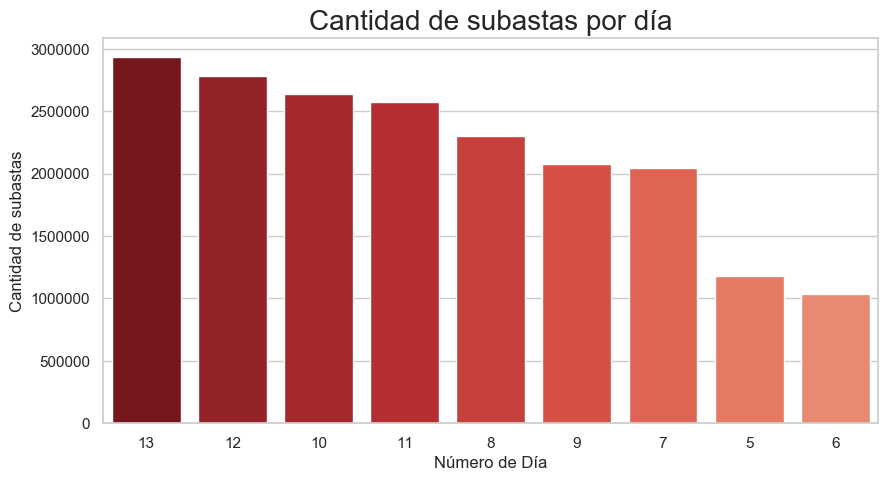

In [38]:
serie_auctions_per_day = auctions['day'].value_counts()

g = sns.barplot(y=serie_auctions_per_day.values, x=serie_auctions_per_day.index, \
                palette=sns.color_palette("Reds_r", 15), order=serie_auctions_per_day.index);
g.set_title('Cantidad de subastas por día', fontsize=20);
g.set_xlabel('Número de Día');
g.set_ylabel('Cantidad de subastas');

- Analizando el gráfico anterior, vemos facilmente que la mayor cantidad de subastas se dan en los últimos días analizados. En este caso serían 13, 12, 10 y 11 de Marzo de 2019.

1.2 Cantidad de subastas por día de la semana

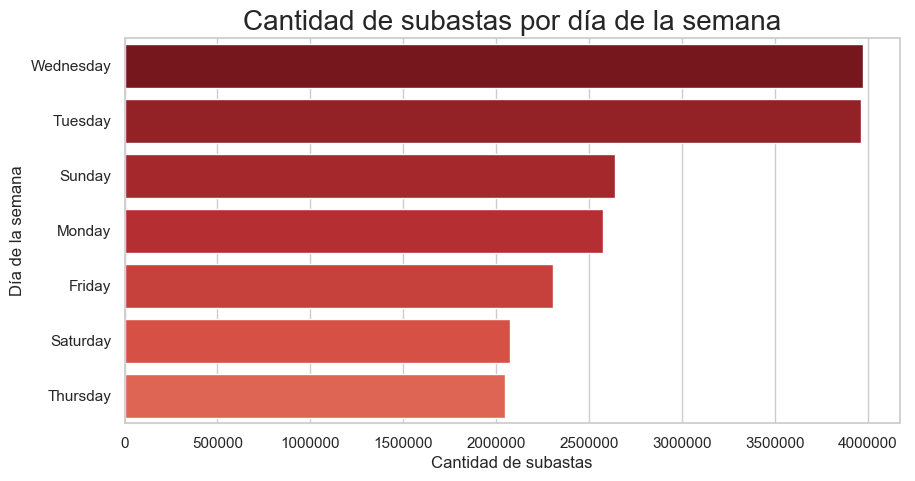

In [39]:
serie_auctions_per_weekday = auctions['weekday'].value_counts()

g = sns.barplot(y=serie_auctions_per_weekday.index, x=serie_auctions_per_weekday.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de subastas por día de la semana', fontsize=20);
g.set_xlabel('Cantidad de subastas');
g.set_ylabel('Día de la semana');

- Como podemos ver, los días Miércoles y Jueves son aquellos días en los que ocurren la mayor cantidad de subastas, siendo entre estos dos muy pareja la cantidad. Luego, viene el Domingo pero con una diferencia considerable con respecto a las primeras dos.

Como vimos anteriormente, los datos analizados corresponden al período del 5 al 13 de Marzo de 2019, por lo que los días Miércoles y Jueves suman la cantidad de subastas de dos semanas distintas.

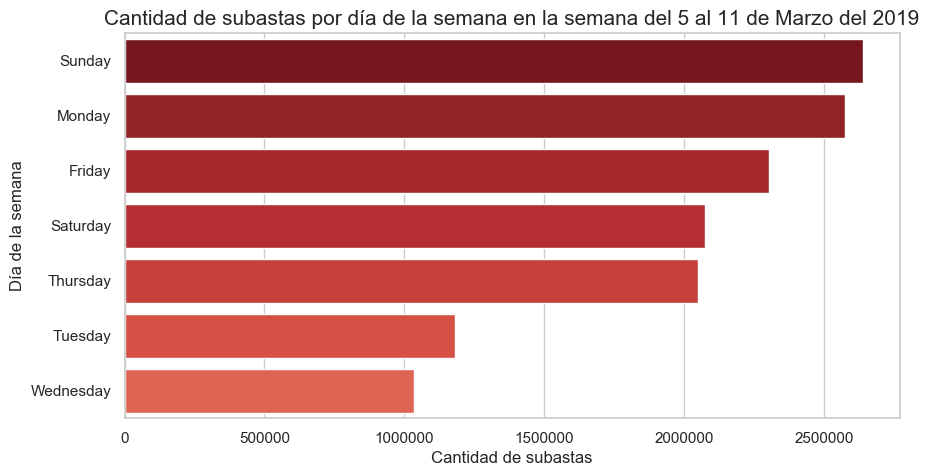

In [40]:
serie_auctions_per_weekday_one_week = auctions.loc[(auctions['day'] <= 11)]['weekday'].value_counts()

g = sns.barplot(y=serie_auctions_per_weekday_one_week.index, x=serie_auctions_per_weekday_one_week.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de subastas por día de la semana en la semana del 5 al 11 de Marzo del 2019', fontsize=15);
g.set_xlabel('Cantidad de subastas');
g.set_ylabel('Día de la semana');

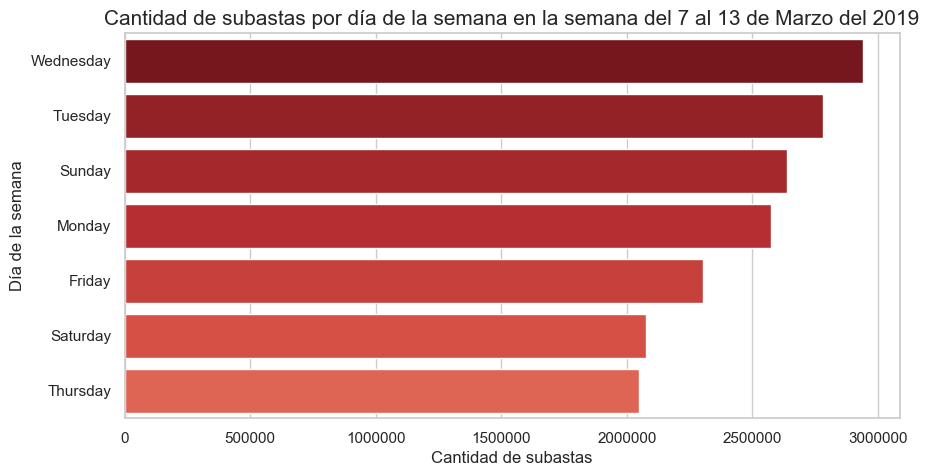

In [41]:
serie_auctions_per_weekday_second_week = auctions.loc[(auctions['day'] > 6)]['weekday'].value_counts()

g = sns.barplot(y=serie_auctions_per_weekday_second_week.index, x=serie_auctions_per_weekday_second_week.values, \
                palette=sns.color_palette("Reds_r", 15));
g.set_title('Cantidad de subastas por día de la semana en la semana del 7 al 13 de Marzo del 2019', fontsize=15);
g.set_xlabel('Cantidad de subastas');
g.set_ylabel('Día de la semana');

- Analizando desde el 7 al 13 de Marzo podemos ver que el orden de la cantidad de subastas por día de la semana es igual que si analizamos todo el período completo. En cambio, si analizamos la primera semana del período del archivo, los días Miércoles y Jueves, obtienen la menor cantidad de subastas, ubicandose en los últimos lugares.
- Por otro lado, podemos observar dicha información en el gráfico 1.1, en donde justamente los dos extremos del período son donde ocurren la mayor y menor cantidad de subastas.

#### 2 - Cantidad de subastas por hora

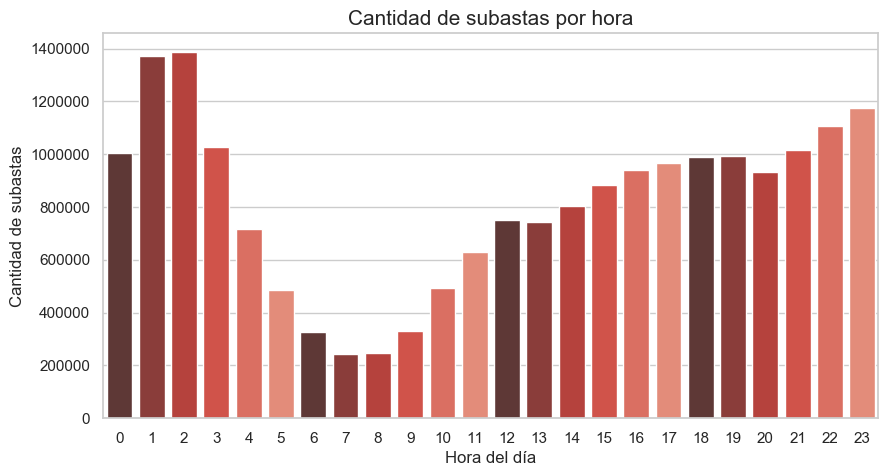

In [42]:
serie_auctions_per_hour = auctions['hour'].value_counts()

g = sns.barplot(y=serie_auctions_per_hour.values, x=serie_auctions_per_hour.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de subastas por hora', fontsize=15);
g.set_xlabel('Hora del día');
g.set_ylabel('Cantidad de subastas');

Del anterior gráficos podemos ver:
- La mayor cantidad de subastas se da a las 2 de la madrugrada. Y también el mayor flujo se da, entre llegando a la medianoche del día y las primeras horas de la madrugada del día siguiente.
- La menor cantidad se da entre el intervalo de las 6 y las 9 de la mañana. En cada una de éstas horas podemos ver que la cantidad de subastas es inferior a 400.000.  

#### 3 - Cantidad de subastas por día y hora

3.1 - Cantidad de subastas por número día y hora

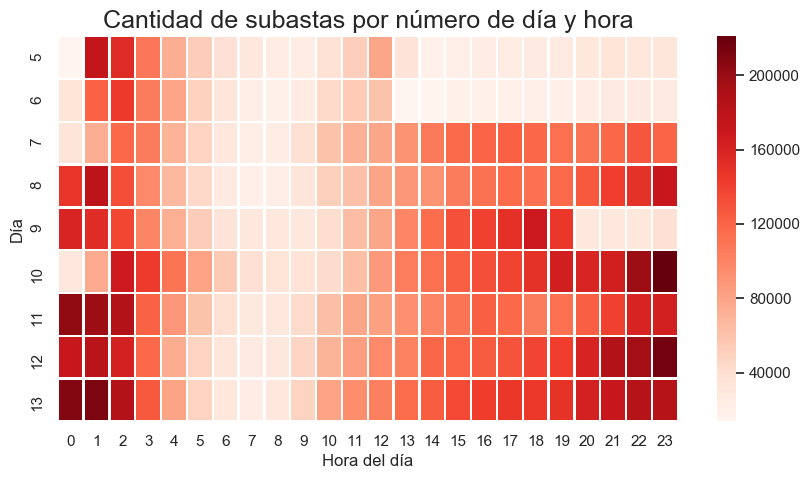

In [43]:
auctions_per_day_hour = auctions.groupby(['day','hour']).size().reset_index()
auctions_per_day_hour.columns=['day','hour','size']
auctions_per_day_hour = auctions_per_day_hour.pivot(index='day', columns='hour',values='size')

g = sns.heatmap(auctions_per_day_hour, annot=False, linewidths=1, cmap='Reds');
g.set_title('Cantidad de subastas por número de día y hora', fontsize=18);
g.set_xlabel('Hora del día');
g.set_ylabel('Día');

- A partir del gráfico podemos confirmar que, sin importar el día, entre las 6 y las 9 de la mañana es donde se produce la menor cantidad de subastas.
- Nos llama la atención la poco cantidad de subastas que se producen a partir del mediodía de los días 5 y 6 del mes de Marzo.

3.2 - Cantidad de subastas por día de la semana y hora

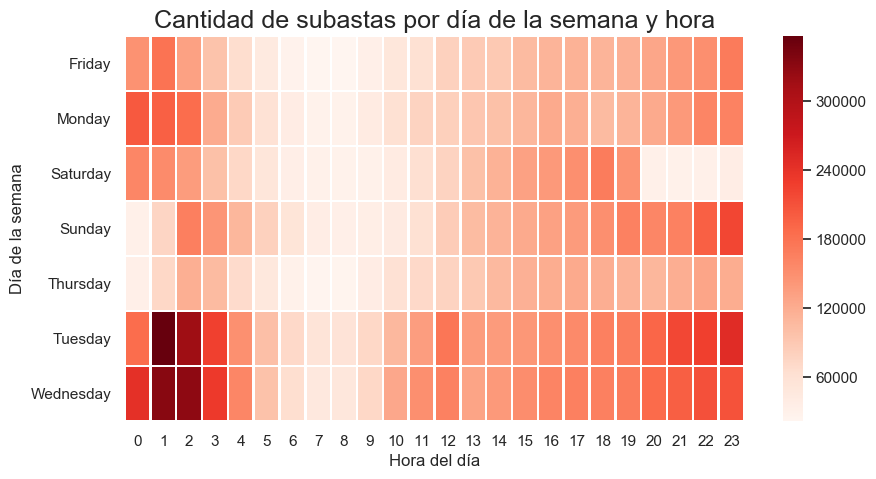

In [44]:
auctions_per_weekday_hour = auctions.groupby(['weekday','hour']).size().reset_index()
auctions_per_weekday_hour.columns=['weekday','hour','size']
auctions_per_weekday_hour = auctions_per_weekday_hour.pivot(index='weekday', columns='hour',values='size')

g = sns.heatmap(auctions_per_weekday_hour, annot=False, linewidths=1, cmap='Reds');
g.set_title('Cantidad de subastas por día de la semana y hora', fontsize=18);
g.set_xlabel('Hora del día');
g.set_ylabel('Día de la semana');

- Aquí nos llamó la atención la poca cantidad de subastas que ocurren entre las 20hs del Sábado y la 1 de las madrugada del Domingo.
- También se confirma que entre la una y dos de la madrugada de los días Miércoles y Jueves es donde se da la mayor cantidad de *auctions*.

#### 4 - Subastas por dispositivo

4.1 - Cantidad de subastas por dispositivo

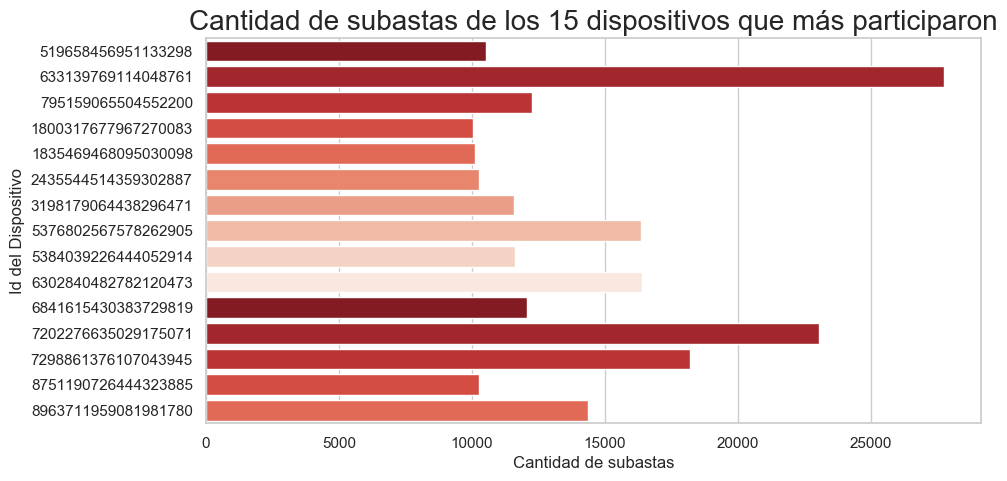

In [45]:
serie_auctions_per_device = auctions['device_id'].value_counts().head(15)

g = sns.barplot(y=serie_auctions_per_device.index, x=serie_auctions_per_device.values, \
                palette=sns.color_palette("Reds_r", 10), orient='h');
g.set_title('Cantidad de subastas de los 15 dispositivos que más participaron', fontsize=20);
g.set_xlabel('Cantidad de subastas');
g.set_ylabel('Id del Dispositivo');

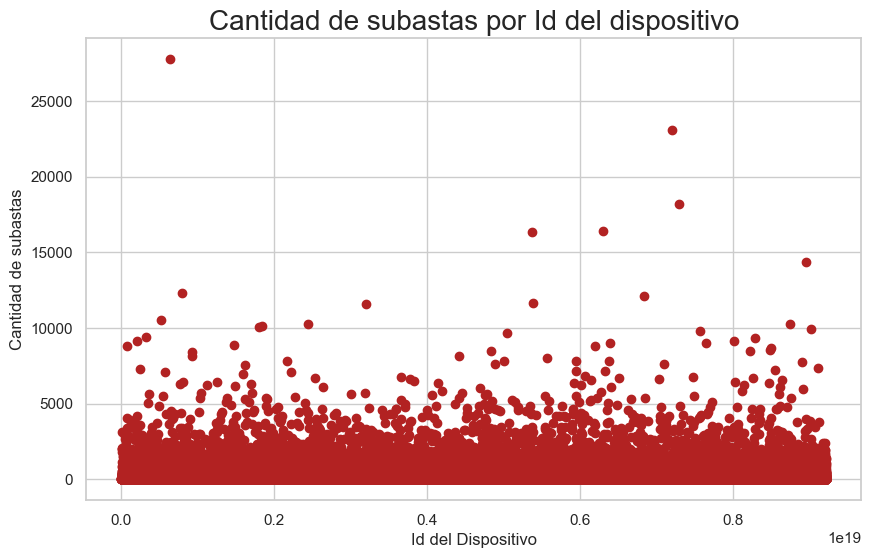

In [46]:
auctions_per_device = auctions.groupby('device_id').size().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(auctions_per_device['device_id'].values, auctions_per_device[0].values, color='firebrick')
plt.title('Cantidad de subastas por Id del dispositivo', fontsize=20)
plt.ylabel('Cantidad de subastas');
plt.xlabel('Id del Dispositivo');

- Como se puede ver en los dos gráaficos anteriores, tenemos que varios dispositivos se encuentran bastante por encima de la media, que indica que cada dispositivo movil participa entre 94 y 95 subastas en el período del 5 de Marzo al 13 de Marzo de 2019. 
- El dispositivo que más participa en subastas lo hace con una cantidad de 27.762 veces. Lo que es un valor extraño ya que indicaría que participa en casi 2 subastas por minuto.

4.2 - Tiempo entre subastas

Vamos a crear una función para determinar el período en el que un mismo dispositivo participa nuevamente en una subasta. Los grupos a formar son:
- ***Menos de 10 minutos.***
- ***Entre 10 y 30 minutos.***
- ***Entre 30 y 60 minutos.***
- ***Entre 1 y 5 horas.***
- ***Entre 5 y 10 horas.***
- ***Entre 10 y 24 horas.***
- ***Entre 1 y 3 días.***
- ***Entre 3 y 6 días.***
- ***Más de 6 días.***

In [47]:
def agruparSegunTiempo(x):
    if (x < 10):
        return 'Menos de 10 minutos'
    elif (x < 30):
        return 'Entre 10 y 30 minutos'
    elif (x < 60):
        return 'Entre 30 y 60 minutos'
    elif (x < 300):
        return 'Entre 1 y 5 horas'
    elif (x < 600):
        return 'Entre 5 y 10 horas'
    elif (x < 1440):
        return 'Entre 10 y 24 horas'
    elif (x < 4320):
        return 'Entre 1 y 3 días'
    elif (x < 8640):
        return 'Entre 3 y 6 días'
    else:
        return 'Más de 6 días'
    
auctions_time['period'] = auctions_time['total_minutes'].apply(lambda x: agruparSegunTiempo(x))

In [48]:
auctions_time.head()

,device_id,date,afterward_date,time_between_dates,total_minutes,period
15970478,693613851330160675,2019-03-05 00:52:33.352526,2019-03-05 00:53:45.598287,00:01:12.245761,1.204096,Menos de 10 minutos
15970479,9063949842367241188,2019-03-05 00:52:40.105398,2019-03-05 00:53:09.693816,00:00:29.588418,0.493140,Menos de 10 minutos
13161747,2824300781193788917,2019-03-05 00:52:45.092232,2019-03-05 00:56:37.040497,00:03:51.948265,3.865804,Menos de 10 minutos
7339830,4395616356137861817,2019-03-05 00:52:46.102552,2019-03-05 00:58:30.464174,00:05:44.361622,5.739360,Menos de 10 minutos
15970480,874322742462616406,2019-03-05 00:52:47.151640,2019-03-05 01:25:41.146609,00:32:53.994969,32.899916,Entre 30 y 60 minutos


In [49]:
auctions_time['period'].value_counts()

Menos de 10 minutos      10436973
Entre 10 y 30 minutos      909832
Entre 1 y 5 horas          715715
Entre 30 y 60 minutos      467776
Entre 10 y 24 horas        344139
Entre 5 y 10 horas         246900
Entre 1 y 3 días           183452
Entre 3 y 6 días            34595
Más de 6 días                3492
Name: period, dtype: int64

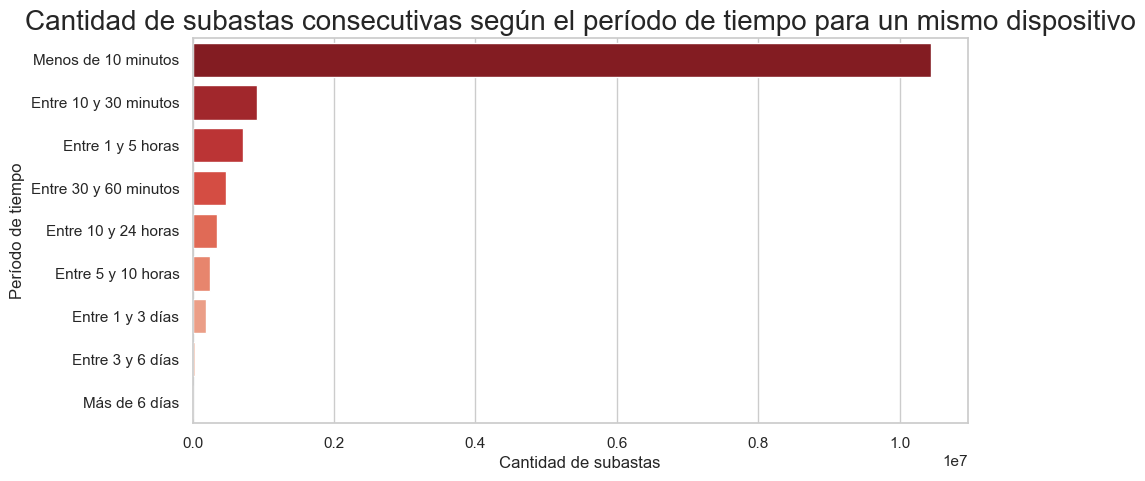

In [50]:
auctions_time_per_period = auctions_time['period'].value_counts()

g = sns.barplot(y=auctions_time_per_period.index, x=auctions_time_per_period.values, \
                palette=sns.color_palette("Reds_r", 10), orient='h');
g.set_title('Cantidad de subastas consecutivas según el período de tiempo para un mismo dispositivo', fontsize=20);
g.set_xlabel('Cantidad de subastas');
g.set_ylabel('Período de tiempo');

A partir de éste gráfico podemos decir:
+ La mayor cantidad de subastas consecutivas en las que participa un mismo dispotivo se da en menos de 10 minutos, con una cantidad bastante considerable. Esto nos puede pasar por dos opciones principalmente: 
    - Que esta clara diferencia sea por aquellos usuarios en los que figura que participan casi continuamente (con una diferencia de segundos nomás, lo que nos parece que los datos están erróneos).
    - O que los usuarios utilizan el dispositivo ésta cantidad de tiempo, también se puede ver que los siguientes valores son ***entre 10 y 30 minutos*** y luego ***entre 1 y 5 horas***.
+ Podemos ver que a medida que pasan los días, la cantidad de subastas en las que participan, disminuyen fuertemente.

#### 5 - Según la plataforma

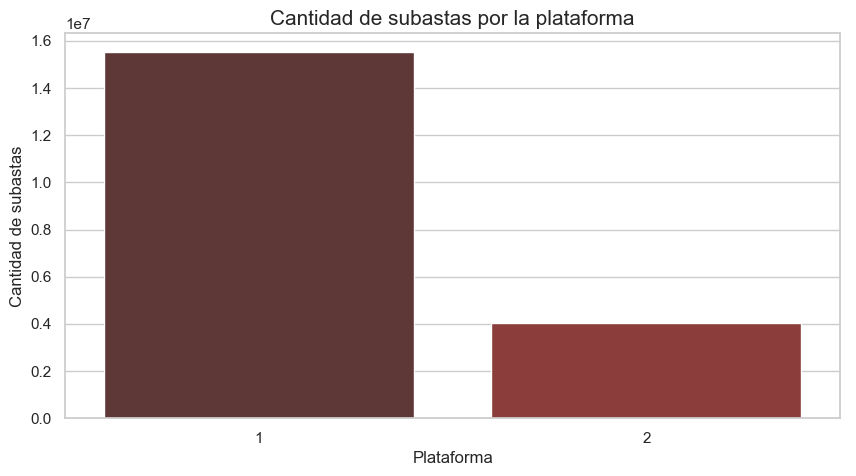

In [51]:
serie_auctions_per_platform = auctions['platform'].value_counts()

g = sns.barplot(y=serie_auctions_per_platform.values, x=serie_auctions_per_platform.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de subastas por la plataforma', fontsize=15);
g.set_xlabel('Plataforma');
g.set_ylabel('Cantidad de subastas');

#### 6 - Según la fuente de la que procede la subasta

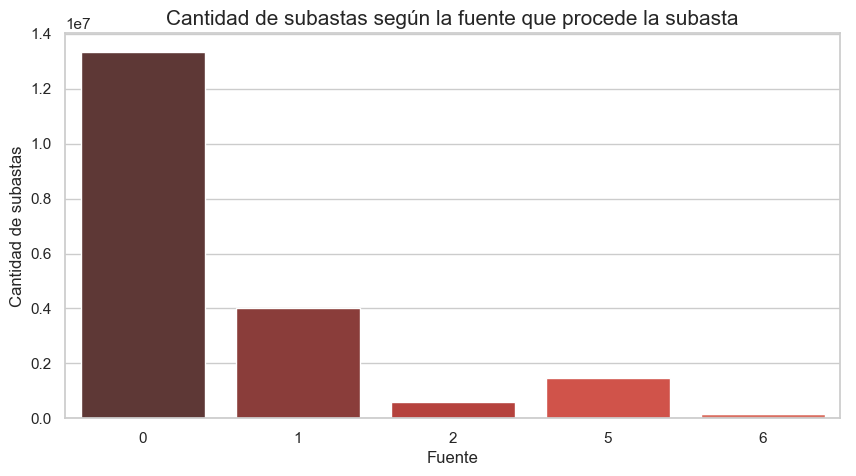

In [52]:
serie_auctions_per_source = auctions['source_id'].value_counts()

g = sns.barplot(y=serie_auctions_per_source.values, x=serie_auctions_per_source.index, \
                palette=sns.color_palette("Reds_d"));
g.set_title('Cantidad de subastas según la fuente que procede la subasta', fontsize=15);
g.set_xlabel('Fuente');
g.set_ylabel('Cantidad de subastas');